In [4]:
import pandas as pd
import numpy as np
from sklearn_som.som import SOM
import math
from sklearn.metrics import v_measure_score, homogeneity_score, completeness_score
from tribus import marker_expression

from minisom import MiniSom

# On CODEX - colon

In [2]:
# read in CODEX donor 004 cl dataset
sample_data = pd.read_csv('C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\STELLAR\\input_data\\STELLAR_data_donor_004_upperlevel_CL.csv',low_memory=False)
print(np.shape(sample_data))

#  perform always outlier truncation, set the maximum to the 99。9 percentile
cols = ['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15',
       'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR',
       'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38',
       'CD90', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68',
       'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO', 'Cytokeratin',
       'CK7', 'CD117', 'CD19', 'Podoplanin', 'CD45', 'CD56', 'CD69',
       'Ki67', 'CD49a', 'CD163', 'CD161']

Q = sample_data[cols].quantile(0.999)

sample_data = sample_data[~((sample_data[cols] > Q)).any(axis=1)]
print(np.shape(sample_data))
sample_data[cols].describe()

(110633, 56)
(106284, 56)


,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,CD117,CD19,Podoplanin,CD45,CD56,CD69,Ki67,CD49a,CD163,CD161
count,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,...,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000,106284.000000
mean,0.018934,0.038266,-0.004457,-0.009820,-0.028353,-0.011265,-0.008890,-0.036611,-0.057418,-0.006119,...,-0.071547,-0.068401,-0.070777,-0.032676,-0.062574,-0.073321,-0.047083,-0.053539,-0.029241,-0.081616
std,0.914082,0.984921,0.887696,0.933128,0.696530,0.937749,0.712971,0.346951,0.380162,0.835283,...,0.356540,0.275826,0.626899,0.917172,0.608046,0.609828,0.673861,0.895300,0.870577,0.149154
min,-0.304221,-0.615595,-0.587612,-0.247549,-0.266702,-0.664865,-0.299039,-0.121470,-0.377534,-0.450804,...,-0.229015,-0.176098,-0.348490,-0.551046,-0.306917,-0.384767,-0.328653,-0.736535,-0.329448,-0.201729
25%,-0.304218,-0.521452,-0.479456,-0.242406,-0.253885,-0.630530,-0.299028,-0.116135,-0.296667,-0.427149,...,-0.220684,-0.174903,-0.323102,-0.549868,-0.274469,-0.372331,-0.272780,-0.584861,-0.314441,-0.180588
50%,-0.302093,-0.355014,-0.362514,-0.235678,-0.204556,-0.510146,-0.289234,-0.088412,-0.184232,-0.327824,...,-0.183918,-0.163973,-0.263523,-0.510200,-0.220518,-0.315779,-0.198523,-0.374125,-0.286509,-0.137325
75%,-0.183386,0.153371,0.072407,-0.181261,-0.059429,0.327718,-0.059975,-0.041563,0.035428,0.007167,...,-0.063341,-0.104564,-0.080356,0.099011,-0.098664,-0.073942,-0.046464,0.051628,-0.164172,-0.039977
max,11.549352,7.490062,8.260476,10.404527,15.325635,5.779878,12.461669,11.155820,3.384302,7.423312,...,5.778162,3.118132,11.054996,6.050057,8.355805,6.205881,12.600368,5.761102,10.761521,1.147414


In [3]:
labels_true_1 = sample_data["cell_type_A"]
print(np.unique(labels_true_1))
      
labels_true_2 = sample_data["cell_type_upperlevel"]
print(np.unique(labels_true_2))

['B' 'CD4T' 'CD7_Immune' 'CD8T' 'DC' 'Endothelial' 'Enterocyte'
 'Enterocyte_CD57p' 'Enterocyte_ITLN1p' 'Goblet' 'ICC' 'Lymphatic'
 'Macrophage' 'Nerve' 'Neuroendocrine' 'Neutrophil' 'Plasma'
 'SmoothMuscle' 'Stroma' 'TA']
['Epithelial' 'Lymphoid' 'Myeloid' 'Stromal']


## Try minisom on all features

In [30]:
# read in CODEX donor 004 cl dataset
sample_data = pd.read_csv('C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\STELLAR\\input_data\\STELLAR_data_donor_004_upperlevel_CL.csv',low_memory=False)
print(np.shape(sample_data))

#  perform always outlier truncation, set the maximum to the 99。9 percentile
cols = ['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15',
       'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR',
       'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38',
       'CD90', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68',
       'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO', 'Cytokeratin',
       'CK7', 'CD117', 'CD19', 'Podoplanin', 'CD45', 'CD56', 'CD69',
       'Ki67', 'CD49a', 'CD163', 'CD161']

Q = sample_data[cols].quantile(0.999)

sample_data = sample_data[~((sample_data[cols] > Q)).any(axis=1)]
print(np.shape(sample_data))
sample_data[cols].describe()

labels_true_1 = sample_data["cell_type_A"]
print(np.unique(labels_true_1))
labels_true_2 = sample_data["cell_type_upperlevel"]
print(np.unique(labels_true_2))

grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = np.arcsinh(sample_data[cols]).to_numpy()

(110633, 56)
(106284, 56)
['B' 'CD4T' 'CD7_Immune' 'CD8T' 'DC' 'Endothelial' 'Enterocyte'
 'Enterocyte_CD57p' 'Enterocyte_ITLN1p' 'Goblet' 'ICC' 'Lymphatic'
 'Macrophage' 'Nerve' 'Neuroendocrine' 'Neutrophil' 'Plasma'
 'SmoothMuscle' 'Stroma' 'TA']
['Epithelial' 'Lymphoid' 'Myeloid' 'Stromal']
40


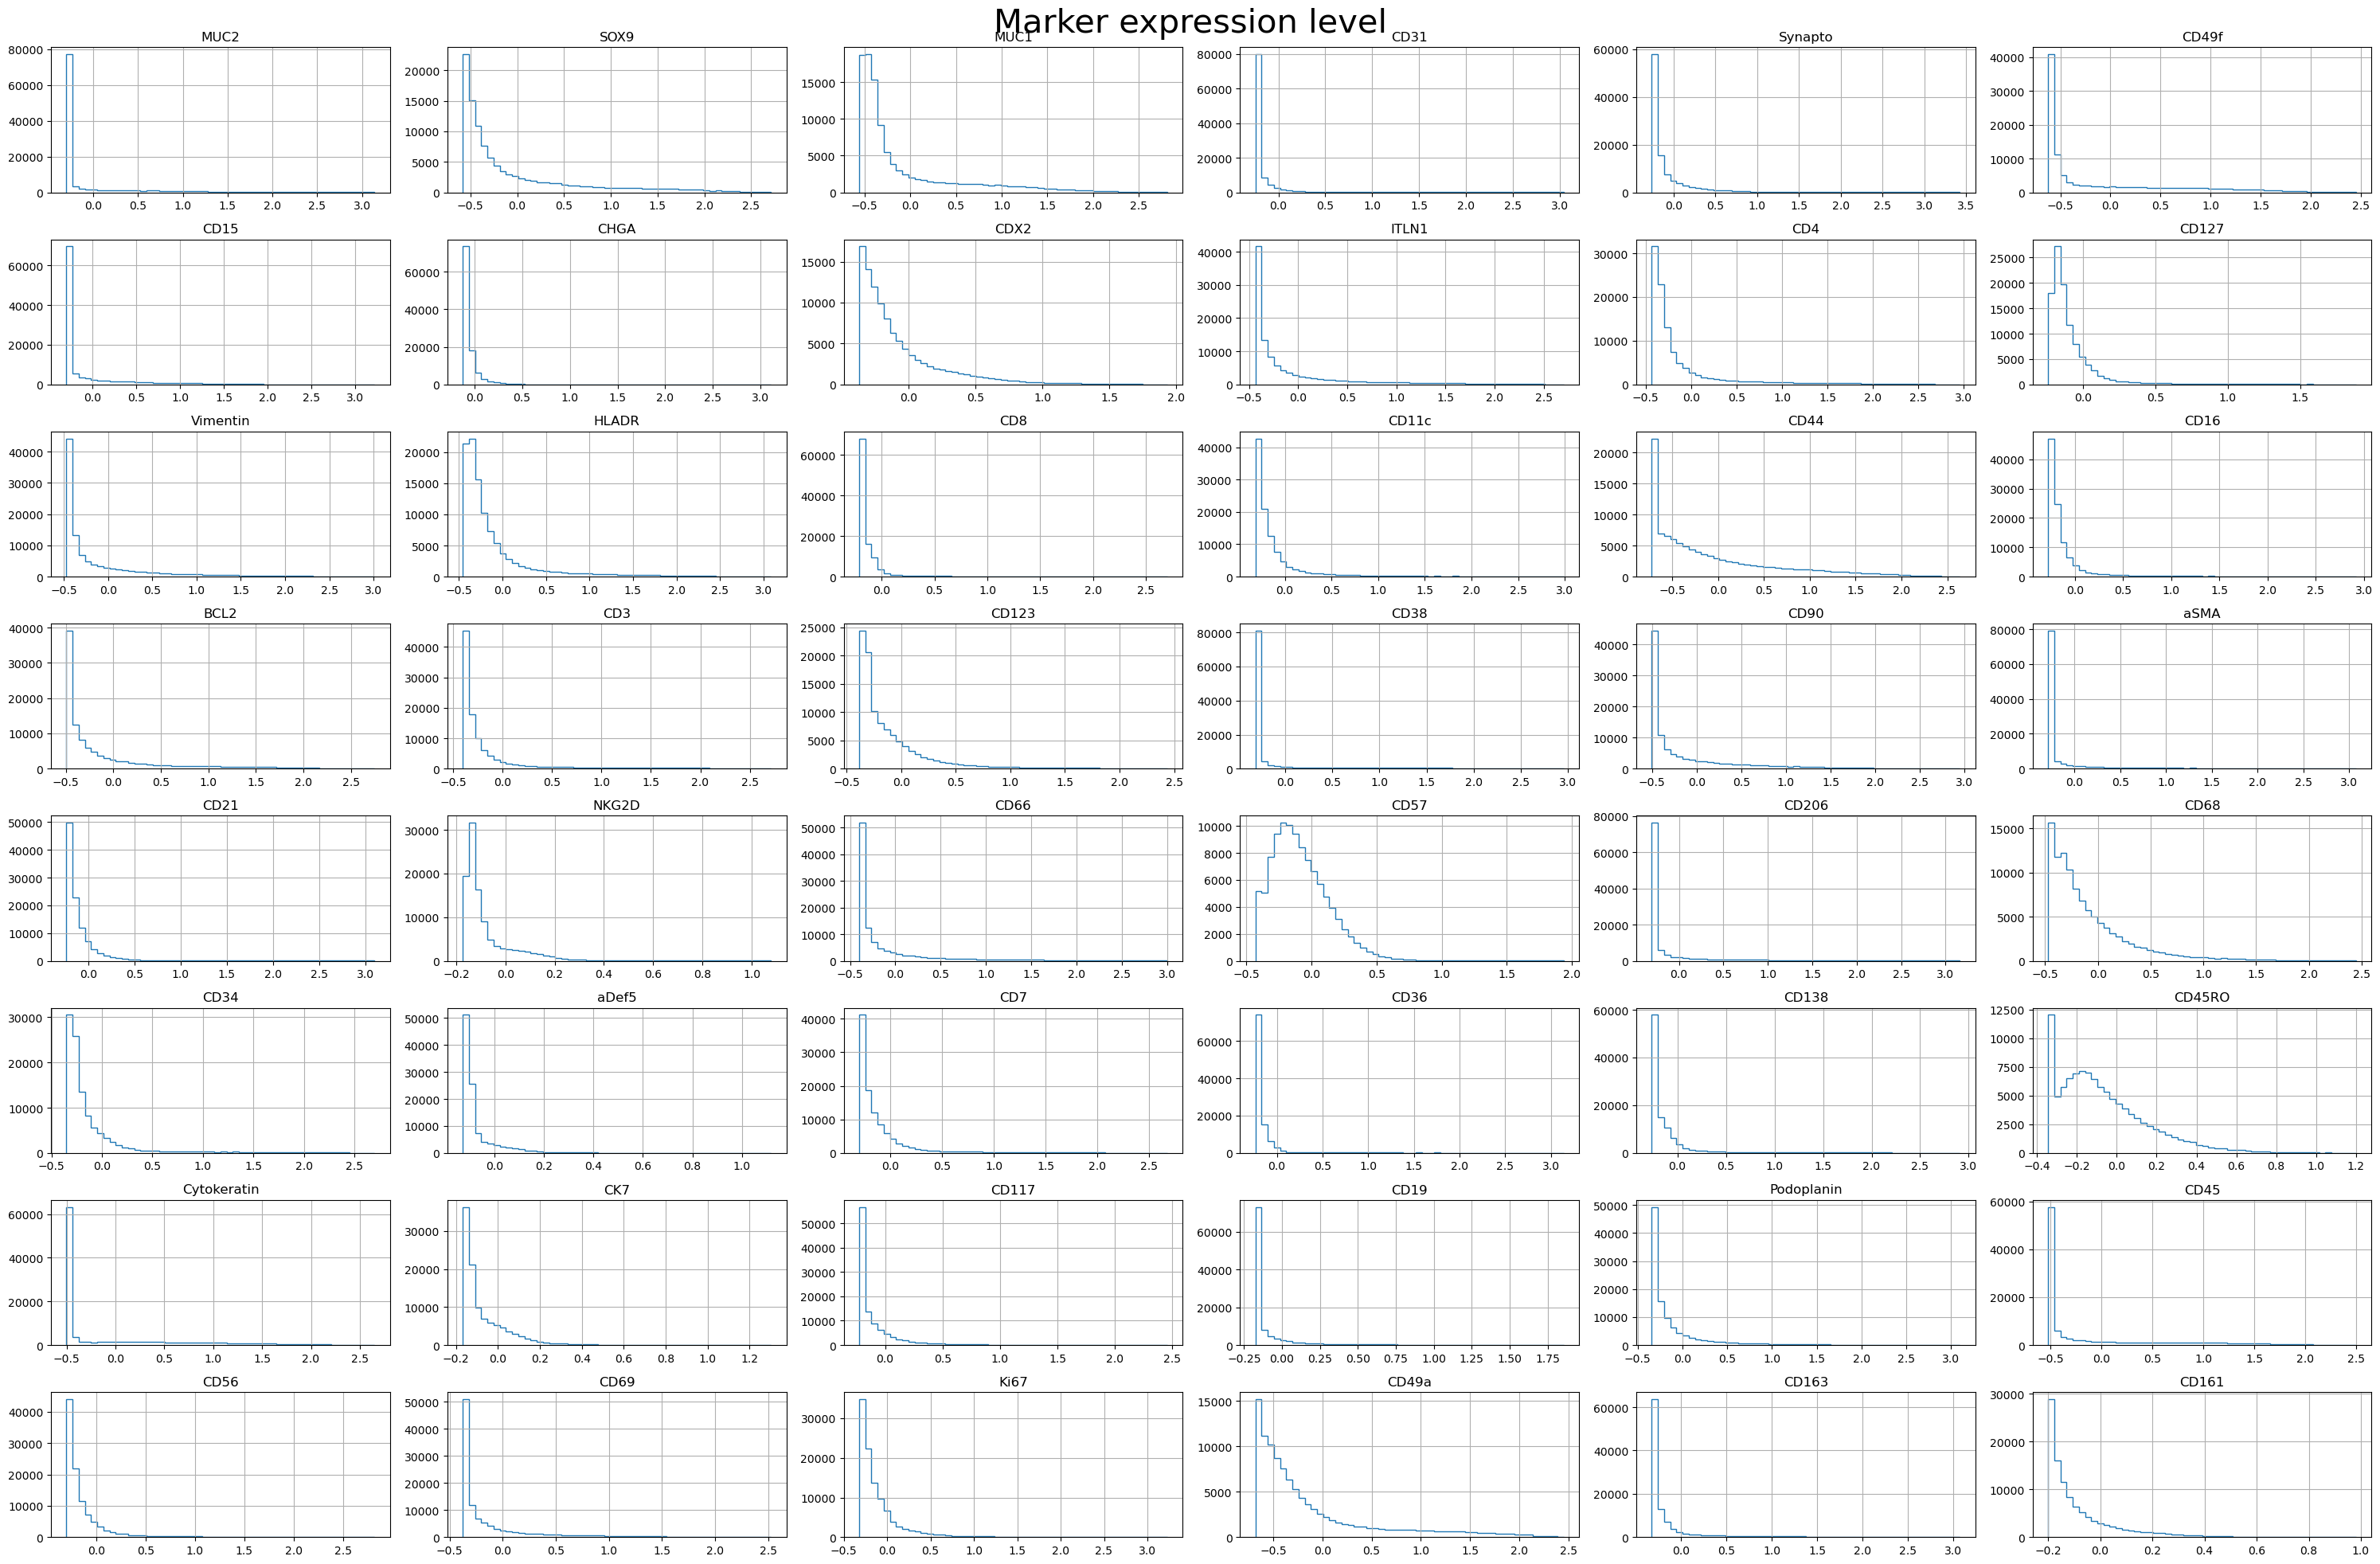

In [31]:
marker_expression(np.arcsinh(sample_data[cols]), markers=None, save=False, fname=None, dpi='figure', log=False)

In [35]:
# Initialization and training
som_shape = (grid_size, grid_size)
som = MiniSom(som_shape[0], som_shape[1], marker_data.shape[1], sigma=.2, learning_rate=.5,
              neighborhood_function='gaussian')

som.train_batch(marker_data, 500, verbose=True)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in marker_data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

len(np.unique(cluster_index))

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 2.6046274453912024


1218

In [36]:
# A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print(homogeneity_score(labels_true_1, cluster_index))
print(homogeneity_score(labels_true_2, cluster_index))
print(completeness_score(labels_true_1, cluster_index))
print(completeness_score(labels_true_2, cluster_index))

0.5421273810926079
0.6336061747239393
0.29298465370323373
0.17940031157811287


## Passing all features to SOM

In [4]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[cols].to_numpy()
marker_data

40


array([[-0.3042183 , -0.6080132 ,  0.16728087, ..., -0.5426361 ,
        -0.2018956 , -0.17369945],
       [-0.3042024 , -0.61031914, -0.0110232 , ..., -0.5849947 ,
        -0.23236017, -0.13553436],
       [-0.3042176 , -0.6155913 , -0.5876095 , ..., -0.5869922 ,
        -0.23971832, -0.20172577],
       ...,
       [-0.30062428, -0.50503945, -0.48140848, ..., -0.61656177,
        -0.28033322, -0.08228533],
       [-0.2410064 , -0.21783201, -0.35086024, ..., -0.38726959,
        -0.12073012, -0.05842298],
       [-0.30421773, -0.57054913, -0.47737324, ..., -0.45999977,
        -0.30988154,  0.25160304]])

In [8]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(homogeneity_score(labels_true_2, predictions))
    print(completeness_score(labels_true_1, predictions))
    print(completeness_score(labels_true_2, predictions))
    # v_measure_score(labels_true, predictions)

380
0.7488638468635713
0.8208590313143044
0.3345774946274484
0.19214217509953363
362
0.7513299203743131
0.8187146620602108
0.33440258369350623
0.19091135930241257
338
0.7463031901924715
0.8147652920279748
0.3403164240822776
0.1946526825128581
397
0.7519025772697535
0.8203969538981357
0.3321693010859324
0.18988131037620967
384
0.754955603845852
0.8155494512607927
0.33497740158442174
0.1895852990038731


In [ ]:
# calculate percentage of lables in each cluster
pd.Dataframe(labels_true, predictions)

## Passing only selected features in logic table to SOM

In [9]:
df = pd.ExcelFile("C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\STELLAR\\stellar_logic_gate_cl_benchmarking.xlsx")
logic = pd.read_excel(df, df.sheet_names, index_col=0)
markers = list(logic["Global"].index)
markers

['CD163',
 'HLADR',
 'CD16',
 'CD206',
 'BCL2',
 'CD69',
 'CD3',
 'CD127',
 'CD45',
 'CD38',
 'CD90',
 'Podoplanin',
 'CD34',
 'CD56',
 'CD49a',
 'aSMA',
 'CDX2',
 'ITLN1',
 'CK7',
 'CD49f',
 'MUC1',
 'SOX9',
 'Cytokeratin']

In [10]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[markers].to_numpy()
marker_data

40


array([[-0.2018956 , -0.3872616 , -0.10116517, ...,  0.16728087,
        -0.6080132 , -0.19392715],
       [-0.23236017, -0.31287947, -0.16798325, ..., -0.0110232 ,
        -0.61031914, -0.08378877],
       [-0.23971832, -0.47311792, -0.18733053, ..., -0.5876095 ,
        -0.6155913 , -0.32287347],
       ...,
       [-0.28033322, -0.30690175, -0.25012749, ..., -0.48140848,
        -0.50503945, -0.4975476 ],
       [-0.12073012, -0.1848031 , -0.26881188, ..., -0.35086024,
        -0.21783201, -0.44756269],
       [-0.30988154, -0.47311687, -0.09144009, ..., -0.47737324,
        -0.57054913, -0.48063546]])

In [11]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(homogeneity_score(labels_true_2, predictions))
    print(completeness_score(labels_true_1, predictions))
    print(completeness_score(labels_true_2, predictions))
    # v_measure_score(labels_true, predictions)

520
0.6792207698974452
0.8071339827209232
0.28767137969028844
0.17909835338196228
527
0.6851126753301765
0.8116002358281239
0.28976607453649467
0.17984069041922765
598
0.6903140939737783
0.8120198590297476
0.28577221920779644
0.1761165540645409
544
0.6802111108670479
0.8040756753085618
0.28966396883104095
0.17939401137629535
624
0.6926919976878696
0.8159428704617603
0.28438414535973533
0.175503274435055


# On MIBI-TOF

In [40]:
# read input files
# no outlier filtering
sample_data = pd.read_csv("C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\CyTOF_TNBC\\input_data\\TNBC_Data_origin.csv")
print(np.shape(sample_data))

#  perform always outlier truncation, set the maximum to the 99。9 percentile
cols = ['Vimentin', 'SMA','FoxP3', 'Lag3', 'CD4', 
        'CD16', 'CD56', 'PD1', 'CD31','PD-L1', 
        'EGFR', 'Ki67', 'CD209', 'CD11c', 'CD138', 
        'CD163','CD68', 'CD8', 'CD3', 'IDO', 
        'Keratin17', 'CD63','CD45RO', 'CD20', 'p53', 
        'Beta catenin', 'HLA-DR', 'CD11b', 'CD45',
        'Pan-Keratin', 'MPO','Keratin6']

Q = sample_data[cols].quantile(0.999)
sample_data = sample_data[~((sample_data[cols] > Q)).any(axis=1)]
print(np.shape(sample_data))

(197678, 59)
(192064, 59)


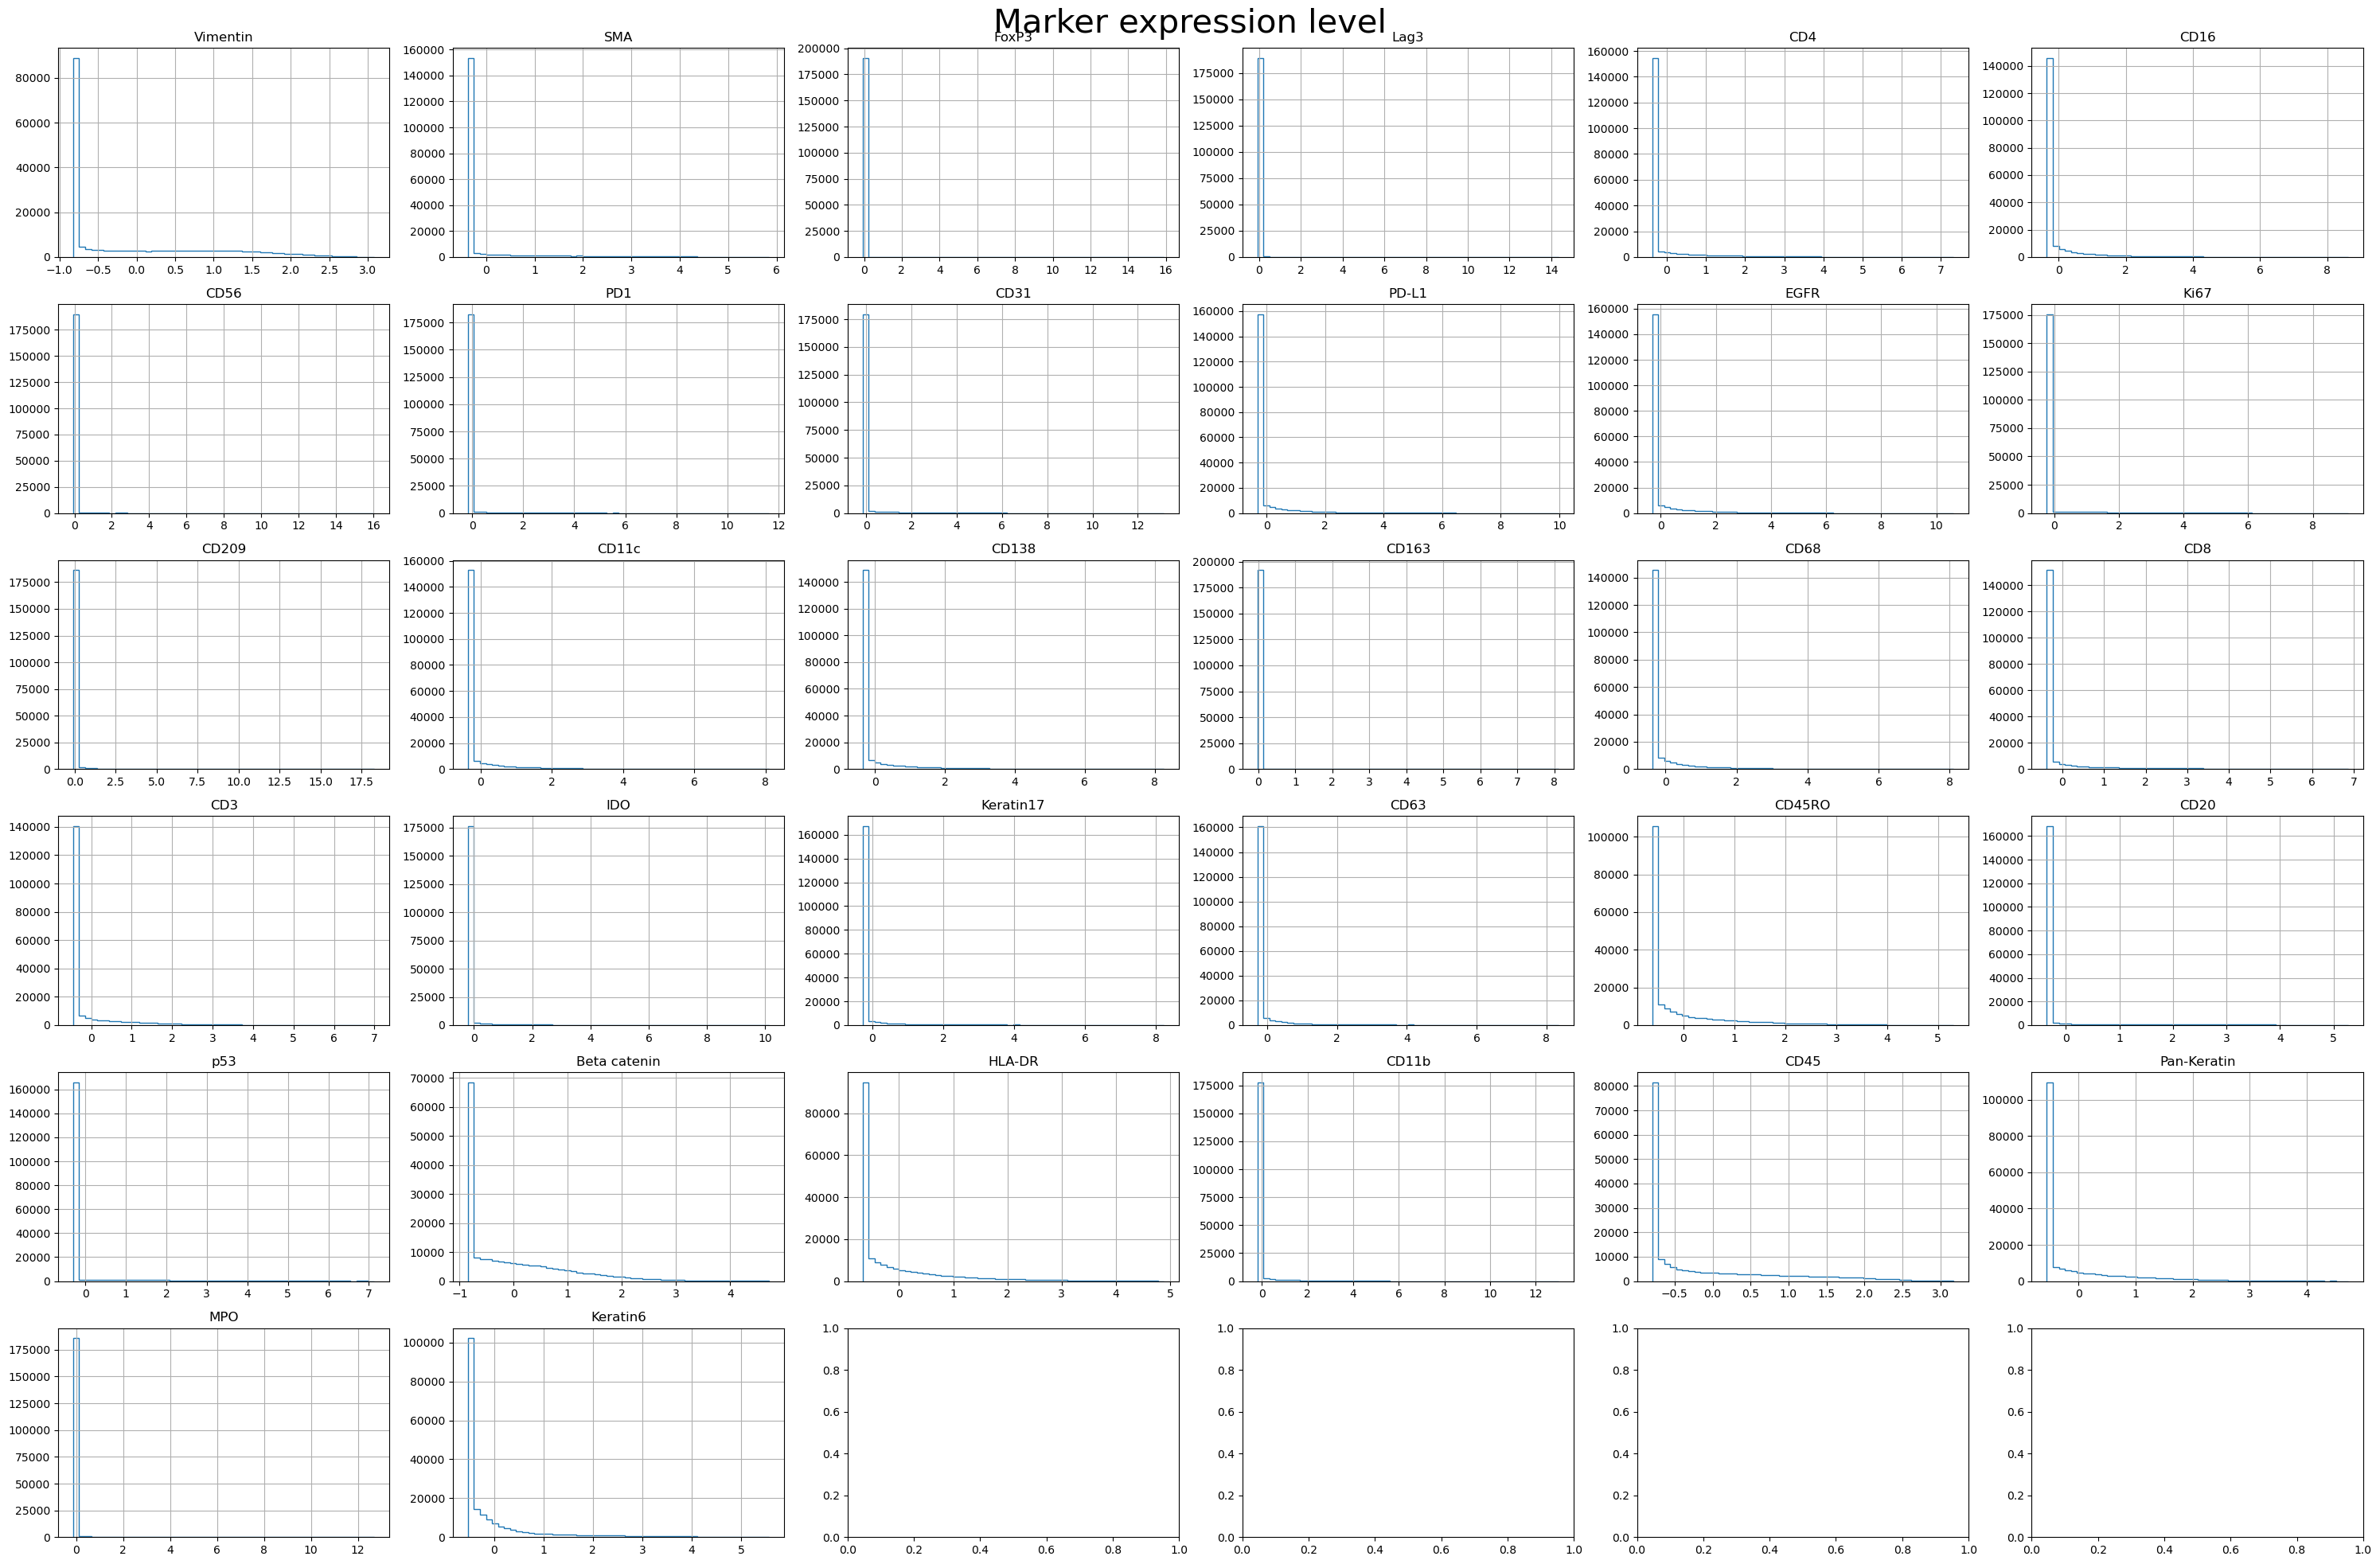

In [41]:
marker_expression(sample_data[cols], markers=None, save=False, fname=None, dpi='figure', log=False)

In [42]:
labels_true_1 = sample_data["DetailedGroup"]
print(np.unique(labels_true_1))
      
labels_true_2 = sample_data["Group"]
print(np.unique(labels_true_2))

['B' 'CD3 T' 'CD4 T' 'CD8 T' 'DC' 'DC/Mono' 'Endothelial' 'Immune'
 'Keratin-positive tumor' 'Macrophages' 'Mesenchymal-like' 'Mono/Neu' 'NK'
 'Neutrophils' 'Other immune' 'Tumor' 'Unidentified']
['Endothelial' 'Immune' 'Keratin-positive tumor' 'Mesenchymal-like'
 'Tumor' 'Unidentified']


## Passing all features to SOM

In [43]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[cols].to_numpy()
marker_data

46


array([[-0.82196 , -0.37796 , -0.076288, ...,  0.65312 , -0.13903 ,
        -0.41883 ],
       [-0.82196 , -0.37796 , -0.076288, ..., -0.032431, -0.13903 ,
        -0.52769 ],
       [-0.82196 , -0.37796 , -0.076288, ...,  1.9133  , -0.13903 ,
         0.18774 ],
       ...,
       [ 2.3197  , -0.37796 , -0.076288, ..., -0.55766 , -0.13903 ,
        -0.52769 ],
       [ 0.98586 , -0.37796 , -0.076288, ..., -0.55766 , -0.13903 ,
        -0.52769 ],
       [ 2.1017  , -0.37796 , -0.076288, ..., -0.55766 , -0.13903 ,
        -0.52769 ]])

In [44]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(homogeneity_score(labels_true_2, predictions))
    print(completeness_score(labels_true_1, predictions))
    print(completeness_score(labels_true_2, predictions))
    # v_measure_score(labels_true, predictions)

666
0.6652949882834024
0.7003956837048763
0.21444239281253477
0.12031739359787995


KeyboardInterrupt: 

## Passing markers in logic table to SOM

In [17]:
df = pd.ExcelFile("C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\CyTOF_TNBC\\logic_gate.xlsx")
logic = pd.read_excel(df, df.sheet_names, index_col=0)
markers = list(logic["Global"].index)
markers

['Keratin6',
 'Beta catenin',
 'CD68',
 'CD11b',
 'CD11c',
 'CD4',
 'CD8',
 'CD3',
 'CD20',
 'CD45',
 'CD45RO']

In [18]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[markers].to_numpy()
marker_data

46


array([[-0.41883, -0.84559, -0.37415, ..., -0.35542, -0.75654, -0.59304],
       [-0.52769, -0.84559, -0.37415, ..., -0.10239,  0.14394,  0.50367],
       [ 0.18774, -0.84559, -0.37415, ..., -0.35542, -0.76261, -0.61647],
       ...,
       [-0.52769, -0.84559,  7.7258 , ..., -0.35542, -0.38483, -0.61647],
       [-0.52769, -0.84559, -0.26285, ..., -0.35542,  0.69519,  0.40489],
       [-0.52769, -0.84559, -0.37415, ...,  1.1735 ,  0.28128, -0.56464]])

In [19]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(homogeneity_score(labels_true_2, predictions))
    print(completeness_score(labels_true_1, predictions))
    print(completeness_score(labels_true_2, predictions))
    # v_measure_score(labels_true, predictions)

1023
0.670878003830354
0.8181116605887918
0.21044840912677432
0.09929089447249397
1014
0.6670894666604956
0.8133294080234873
0.21061818561359902
0.09935117453887911
1122
0.6743080894075343
0.815300665093456
0.20753839507804434
0.09708510998091179
1075
0.6714437153832108
0.8184460048639349
0.21117170378197994
0.09958888955910289
1085
0.672738152396061
0.8164326771536584
0.2101796562812499
0.09868695391953314


# On TMA

In [38]:
# read input files
# no outlier filtering
sample_data = pd.read_csv("C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\TMA_works\\TMA_all_data.csv")
print(np.shape(sample_data))

#  perform always outlier truncation, set the maximum to the 99。9 percentile
cols = ['CD11c', 'CD1c', 'CD4', 'CD3d', 'CD20', 'CD163',
       'CD8a', 'cCasp3', 'pSTAT1', 'Ki67', 'PDL1', 'IBA1', 'FOXP3', 'PD1',
       'Ecadherin', 'vimentin', 'CD31', 'P21', 'CK7', 'CD45']

Q = sample_data[cols].quantile(0.999)
sample_data = sample_data[~((sample_data[cols] > Q)).any(axis=1)]
print(np.shape(sample_data))

(124623, 32)
(122352, 32)


In [39]:
sample_data.columns

Index(['ROW_ID', 'ROW_VERSION', 'Patient', 'cores', 'Cellid', 'rabbit_488',
       'Rat_555', 'Mouse_647', 'CD11c', 'CD1c', 'CD4', 'CD3d', 'CD20', 'CD163',
       'CD8a', 'cCasp3', 'pSTAT1', 'Ki67', 'PDL1', 'IBA1', 'FOXP3', 'PD1',
       'Ecadherin', 'vimentin', 'CD31', 'P21', 'CK7', 'CD45', 'Eccentricity',
       'X_position', 'Y_position', 'CellType'],
      dtype='object')

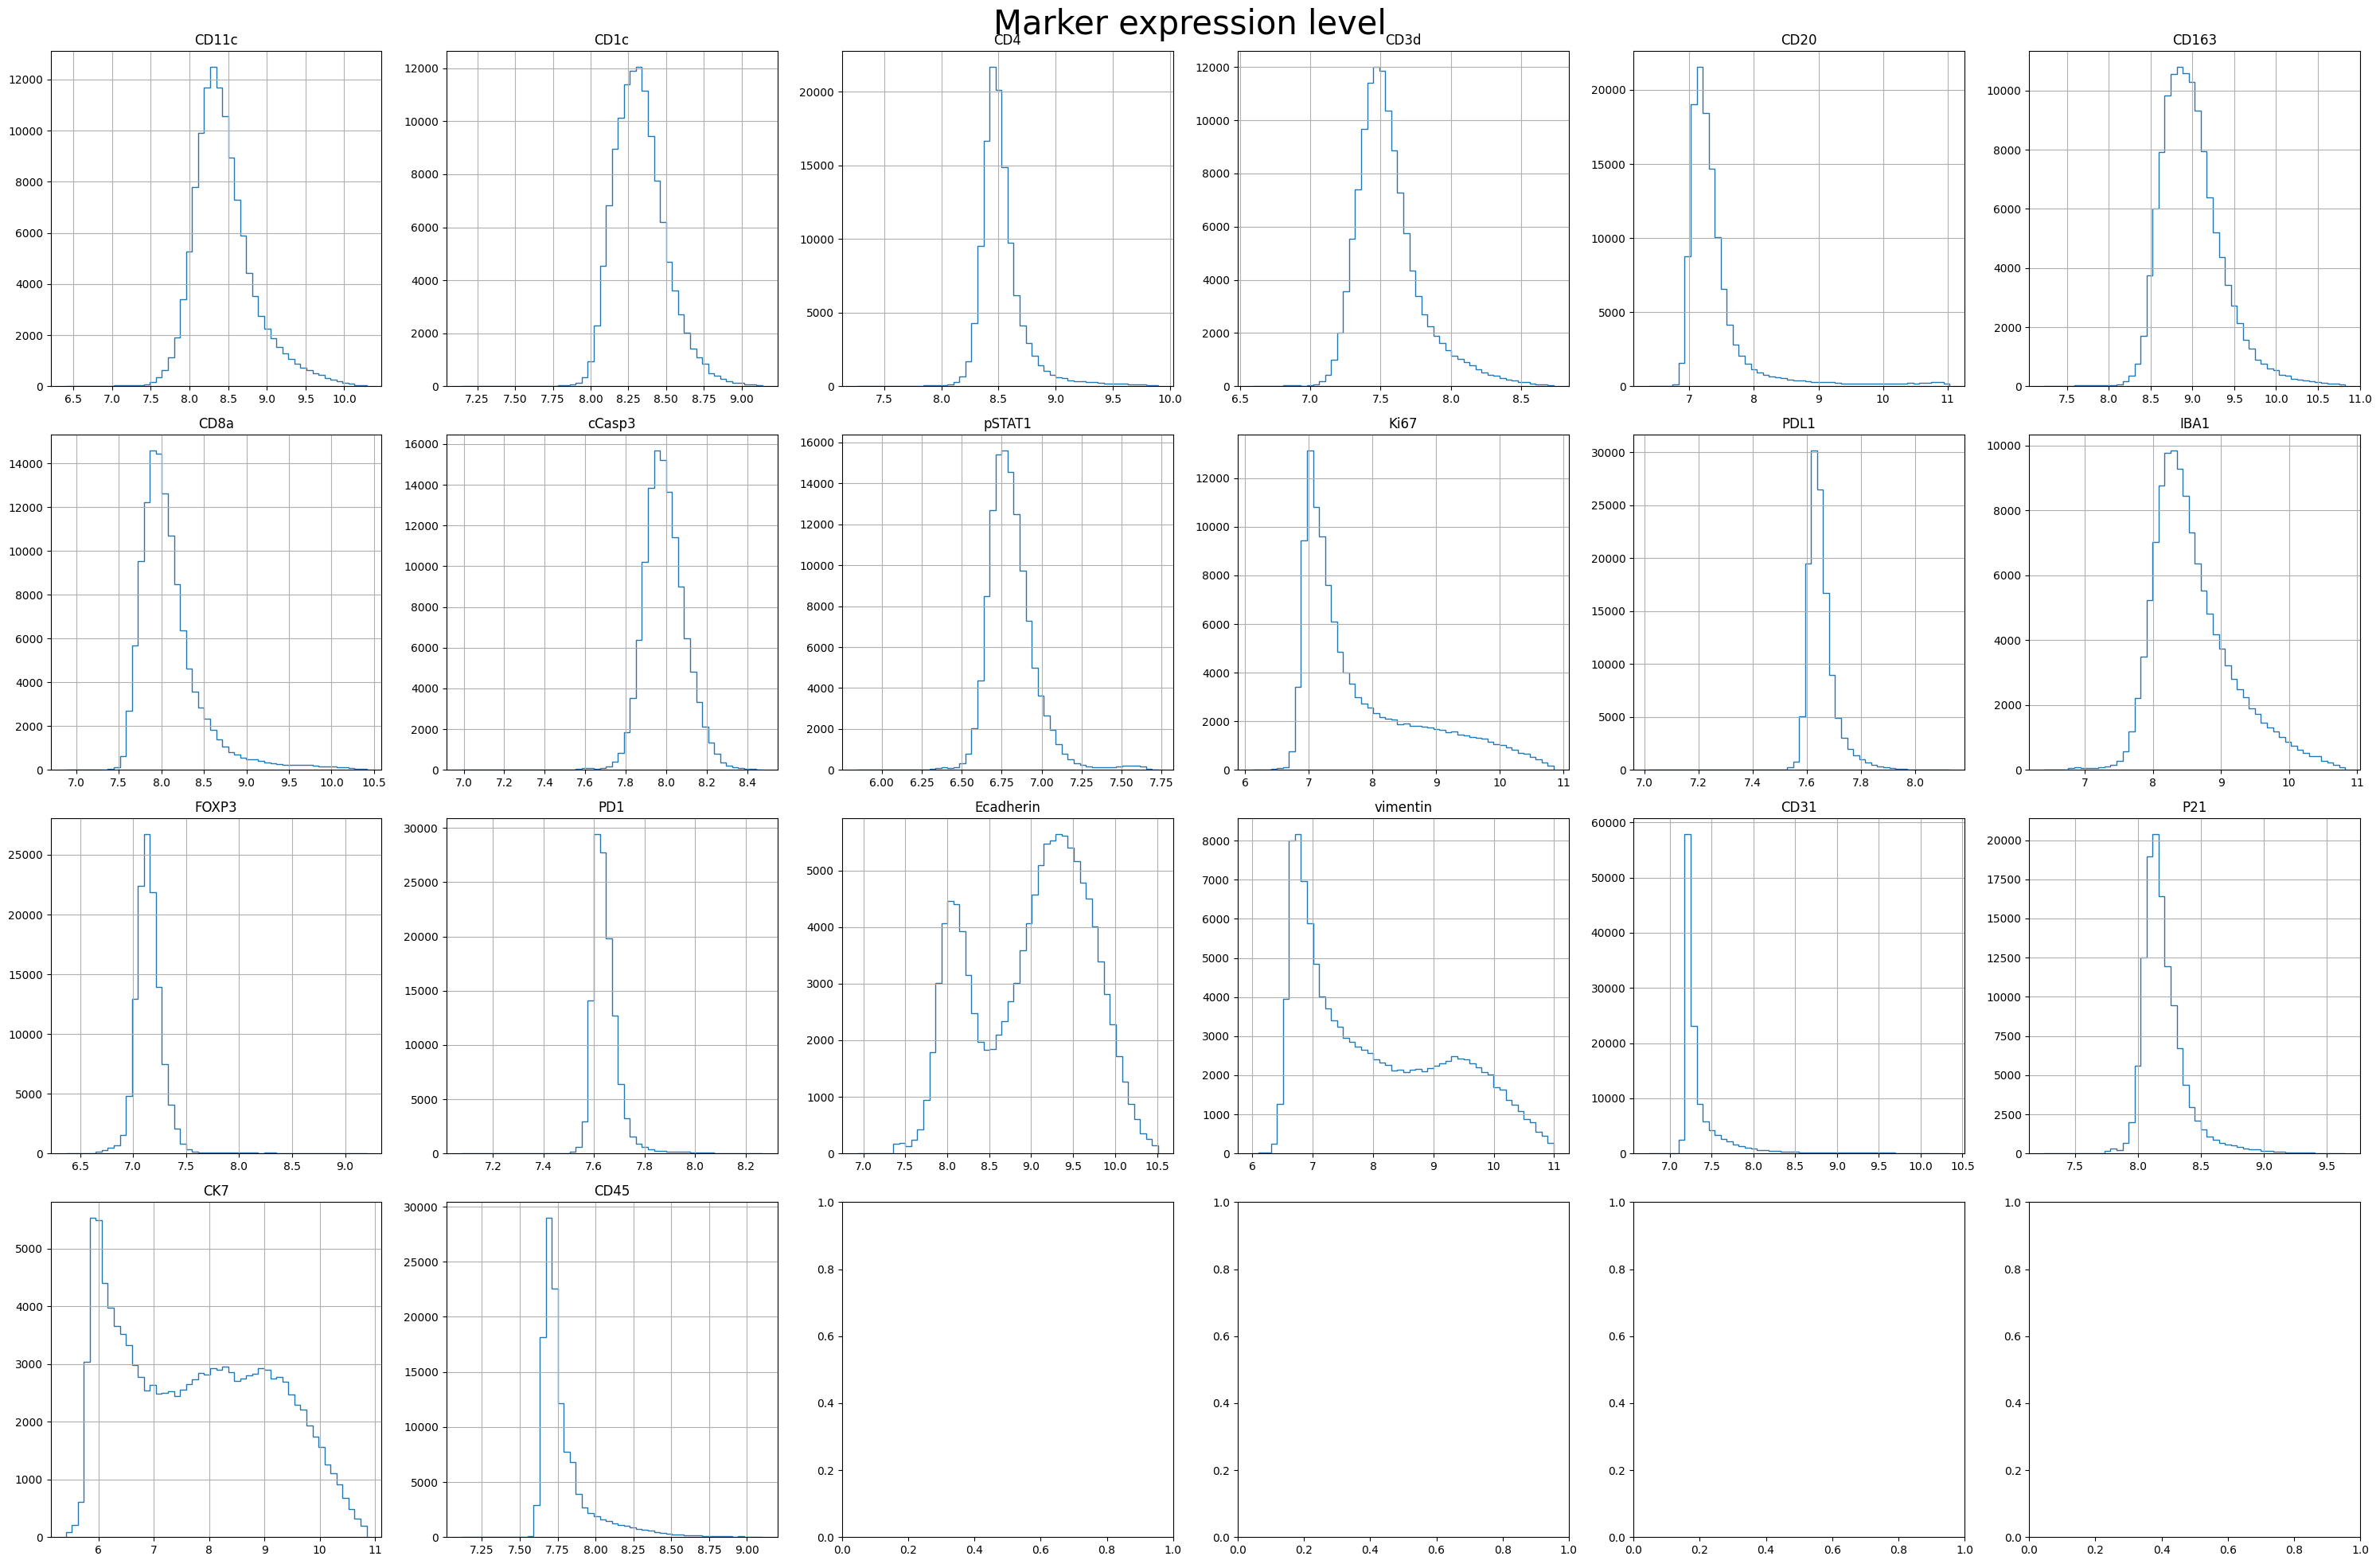

In [53]:
marker_expression(sample_data[cols], markers=None, save=False, fname=None, dpi='figure', log=False)

In [59]:
labels_true_1 = sample_data["CellType"]
print(np.unique(labels_true_1))
print(len(np.unique(labels_true_1)))

['Apoptotic' 'B-cells' 'CD11c+APC' 'CD11c+CD163+IBA1+Macrophages'
 'CD11c+IBA1+Macrophages' 'CD163+IBA1+Macrophages' 'CD163+Macrophages'
 'CD4+effectorT-cells' 'CD8+T-cells' 'EMT' 'Endothelia' 'Epithelial'
 'FOXP3+CD4+Tregs' 'Functional_epithelial' 'Functional_stroma' 'High-P21'
 'High-Vimentin' 'High-proliferative_Stroma' 'IBA1+Macrophages'
 'Low-vimentin' 'Low_eccentricity' 'Mesenchymal'
 'Non-proliferative_Stroma' 'Other' 'Proliferating EMT'
 'Proliferating epithelial' 'Proliferative_Stroma']
27


## Passing all features to SOM

In [45]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[cols].to_numpy()
marker_data

41


array([[6.4011879 , 7.14464092, 7.26252317, ..., 7.25767469, 5.4257884 ,
        7.11476183],
       [6.73154211, 7.42500353, 7.5551877 , ..., 7.50497961, 5.61665201,
        7.33350039],
       [8.88309669, 8.20700836, 8.76169014, ..., 8.14825058, 8.44559765,
        7.7483964 ],
       ...,
       [8.30977535, 8.45106125, 8.3466959 , ..., 8.09685516, 8.86096096,
        8.03707504],
       [8.24768925, 8.66736603, 8.6261282 , ..., 8.12112713, 7.83190107,
        7.9004693 ],
       [8.28463078, 8.47727871, 8.34584904, ..., 8.53464794, 8.30745888,
        7.81465149]])

In [47]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(completeness_score(labels_true_1, predictions))
    # v_measure_score(labels_true, predictions)

132
0.5394737967757273
0.29758866316988203
172
0.5398729603093884
0.2834359711430676
136
0.5424608584534326
0.2971496615875867
164
0.5373029515201689
0.28368721435713196
155
0.5340630234329778
0.28529683734660816


## Passing selected features to SOM

In [60]:
df = pd.ExcelFile("C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\TMA_works\\cell_type_descriptions.xlsx")
logic = pd.read_excel(df, df.sheet_names, index_col=0)
markers = list(logic["Global"].index)
markers

['CK7',
 'Ecadherin',
 'CD163',
 'IBA1',
 'CD8a',
 'CD20',
 'CD4',
 'vimentin',
 'CD11c',
 'FOXP3',
 'Eccentricity',
 'CD45',
 'CD3d']

In [61]:
grid_size = int(np.sqrt(np.sqrt(len(sample_data)) * 5))
print(grid_size)
marker_data = sample_data[markers].to_numpy()
marker_data

41


array([[5.4257884 , 6.9267664 , 7.22944069, ..., 0.80642712, 7.11476183,
        6.59237337],
       [5.61665201, 7.16605997, 7.55508757, ..., 0.99410564, 7.33350039,
        6.77183819],
       [8.44559765, 8.50252628, 9.97388649, ..., 0.88185132, 7.7483964 ,
        7.93622494],
       ...,
       [8.86096096, 8.70282841, 8.6248703 , ..., 0.86506307, 8.03707504,
        7.54436255],
       [7.83190107, 8.08921242, 8.84065342, ..., 0.81377017, 7.9004693 ,
        7.55548   ],
       [8.30745888, 8.40506744, 8.67947006, ..., 0.42801151, 7.81465149,
        7.46625519]])

In [62]:
for i in range(5): 
    som = SOM(m=grid_size, n=grid_size, dim=marker_data.shape[1], random_state=None)
    som.fit(marker_data)
    predictions = som.predict(marker_data)
    unique, counts = np.unique(predictions, return_counts=True)

    print(len(unique))
    counts

    # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
    print(homogeneity_score(labels_true_1, predictions))
    print(completeness_score(labels_true_1, predictions))
    # v_measure_score(labels_true, predictions)

150
0.42499446335773056
0.2276675989526087
173
0.44066735331145807
0.23038832272633178


KeyboardInterrupt: 